In [ ]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
YOLO('yolov8s.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
import zipfile
import os

ZIP_FILE = "My First Project.v11i.yolov8.zip"
DATASET_DIR = "dataset"

with zipfile.ZipFile(ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(DATASET_DIR)

print("Extracted files:", os.listdir(DATASET_DIR))


Extracted files: ['train', 'valid', 'README.dataset.txt', 'data.yaml', 'README.roboflow.txt', 'test']


In [ ]:
!find dataset -maxdepth 3 -type d

dataset
dataset/test
dataset/test/images
dataset/test/labels
dataset/valid
dataset/valid/images
dataset/valid/labels
dataset/train
dataset/train/images
dataset/train/labels


In [ ]:
!cat dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Dent']

roboflow:
  workspace: nishant-gosavi-vnvdz
  project: my-first-project-en9if
  version: 11
  license: CC BY 4.0
  url: https://universe.roboflow.com/nishant-gosavi-vnvdz/my-first-project-en9if/dataset/11

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")  # n, s, m, l, x

model.train(
    data="dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f43a54b0440>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
results = model.predict(
    source="dataset/images/val",
    conf=0.25,
    save=True
)


FileNotFoundError: dataset/images/val does not exist

In [ ]:
from IPython.display import Image, display
import os

VAL_DIR = "runs/detect/val"

for file in [
    "confusion_matrix.png",
    "precision_recall_curve.png",
    "results.png",
    "F1_curve.png"
]:
    path = os.path.join(VAL_DIR, file)
    if os.path.exists(path):
        display(Image(filename=path))


In [ ]:
model1 = YOLO("best.pt")

In [ ]:
model1.predict(
    source="dataset/test/images",
    conf=0.15,
    save=True,
    imgsz=640
)



image 1/71 /content/dataset/test/images/01_jpg.rf.439ee91286b8e71875f6143620f94f8f.jpg: 640x640 (no detections), 16.3ms
image 2/71 /content/dataset/test/images/04_jpg.rf.04fcd4d0e6ba1740e668233e421de7cc.jpg: 640x640 2 Dents, 16.2ms
image 3/71 /content/dataset/test/images/07_jpg.rf.07a8eeb061e8077986c61a1ef4b28aa9.jpg: 640x640 1 Dent, 16.2ms
image 4/71 /content/dataset/test/images/07ca5ea5-bc40-4fcb-8b17-edfd3451950c_jpg.rf.ef2c75de069f187dacde381d862f9908.jpg: 640x640 2 Dents, 16.2ms
image 5/71 /content/dataset/test/images/08319a1b-304c-46cd-a428-f28cc0403cd7_jpg.rf.53d485804f23a58760f7d3604d41bc10.jpg: 640x640 1 Dent, 16.2ms
image 6/71 /content/dataset/test/images/09c32fb2-7df9-4632-9296-ca64d679404c_jpg.rf.39d81d2f9f3c3b61ebe6550ed7c55562.jpg: 640x640 1 Dent, 16.2ms
image 7/71 /content/dataset/test/images/0d6e9195-image51_png.rf.a5178b9a43acdfc71c31b9eb85ffaf91.jpg: 640x640 1 Dent, 16.2ms
image 8/71 /content/dataset/test/images/10_jpg.rf.d6ab0b6371298197c2e14a8f290908ce.jpg: 640x640

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Dent'}
 obb: None
 orig_img: array([[[173, 179, 184],
         [173, 179, 184],
         [173, 179, 184],
         ...,
         [137, 143, 142],
         [137, 142, 143],
         [137, 142, 143]],
 
        [[173, 179, 184],
         [173, 179, 184],
         [173, 179, 184],
         ...,
         [137, 143, 142],
         [137, 142, 143],
         [137, 142, 143]],
 
        [[173, 179, 184],
         [173, 179, 184],
         [173, 179, 184],
         ...,
         [137, 143, 142],
         [137, 143, 142],
         [137, 143, 142]],
 
        ...,
 
        [[187, 208, 223],
         [186, 207, 222],
         [181, 202, 217],
         ...,
         [ 52,  65,  73],
         [ 43,  56,  64],
         [ 40,  53,  61]],
 
        [[172, 193, 208],
         [172, 193, 208],
         [166, 187, 202],
         ...,
         [ 68,  81, 

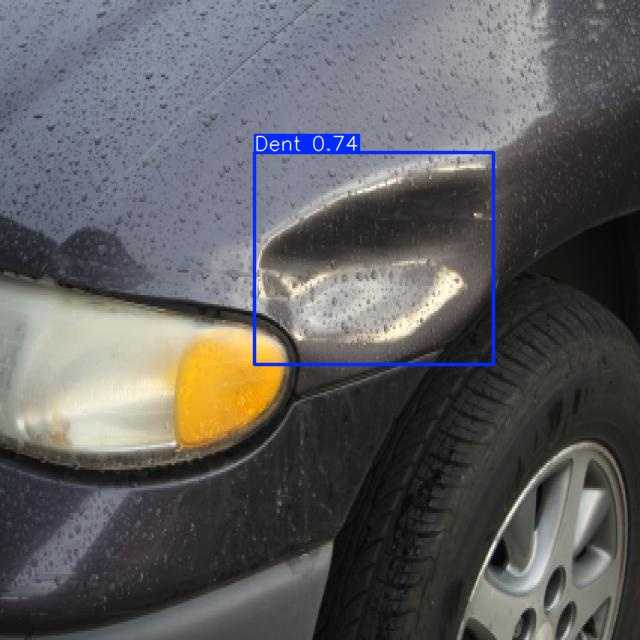

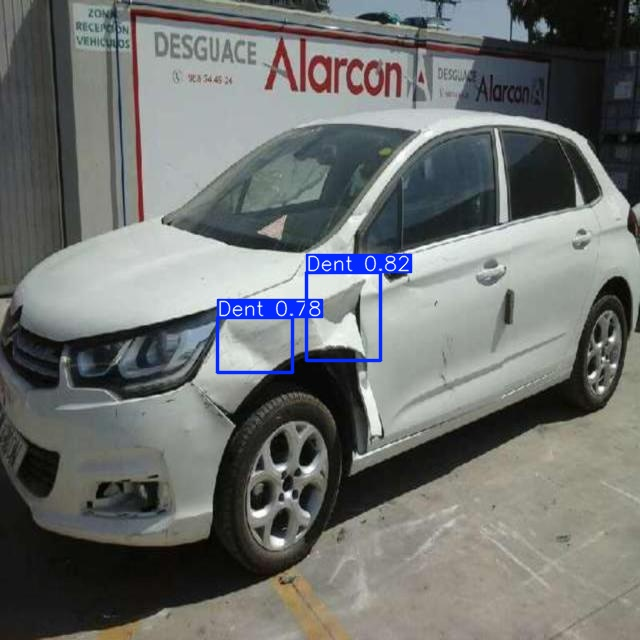

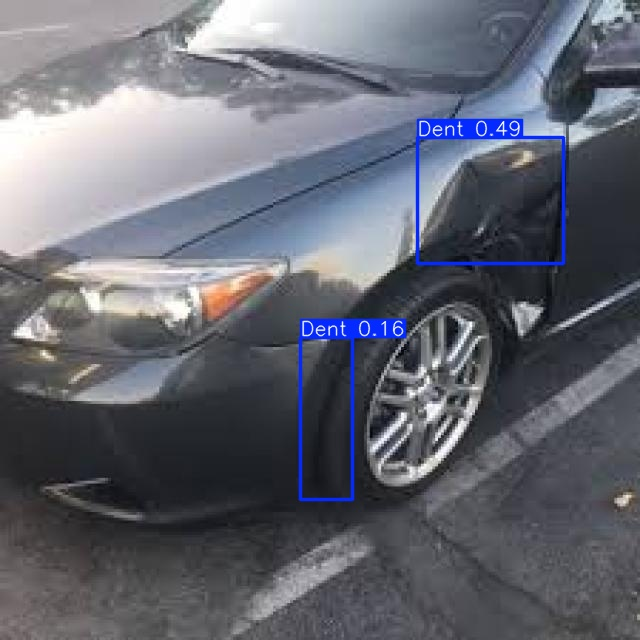

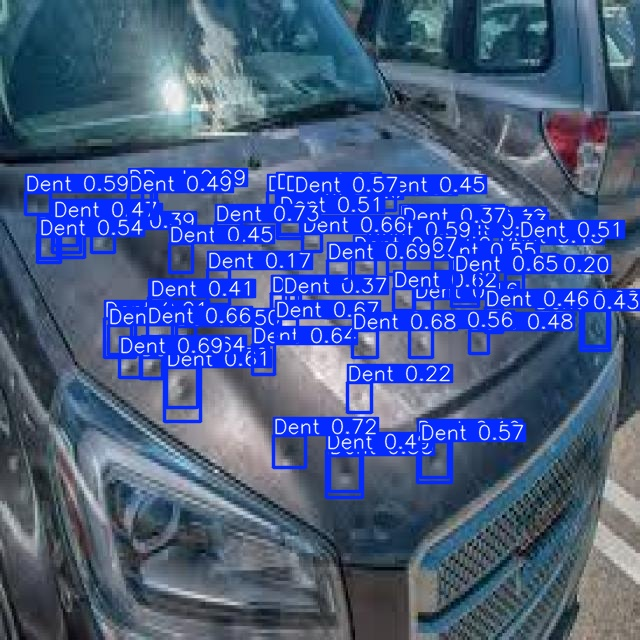

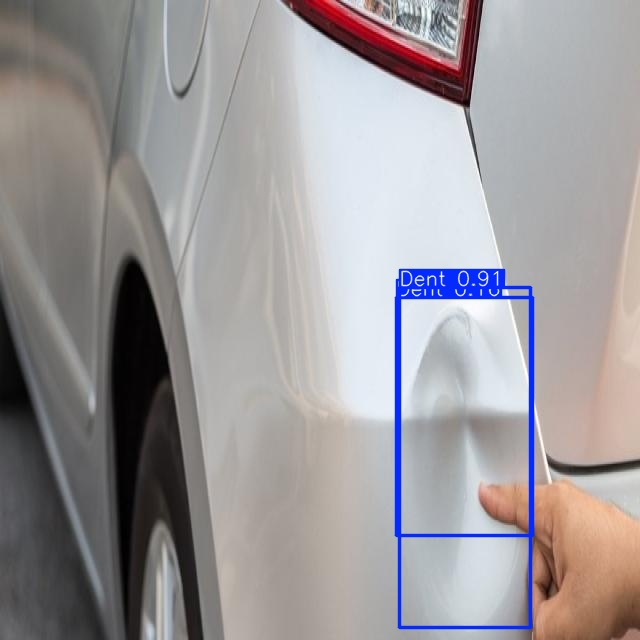

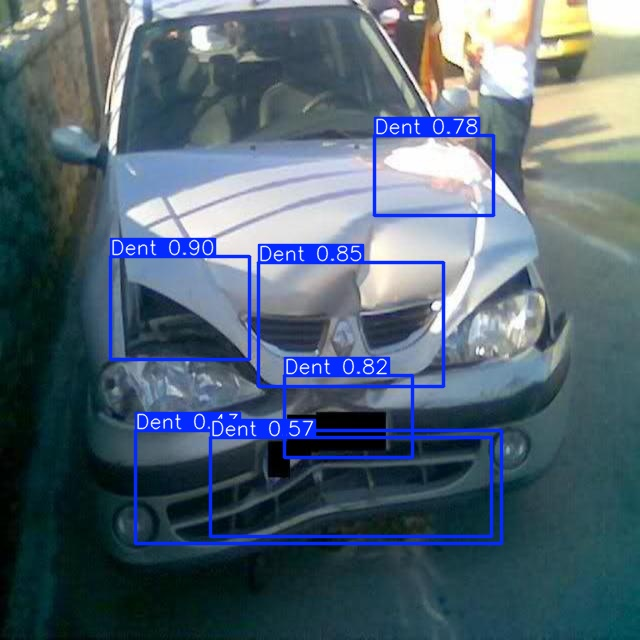

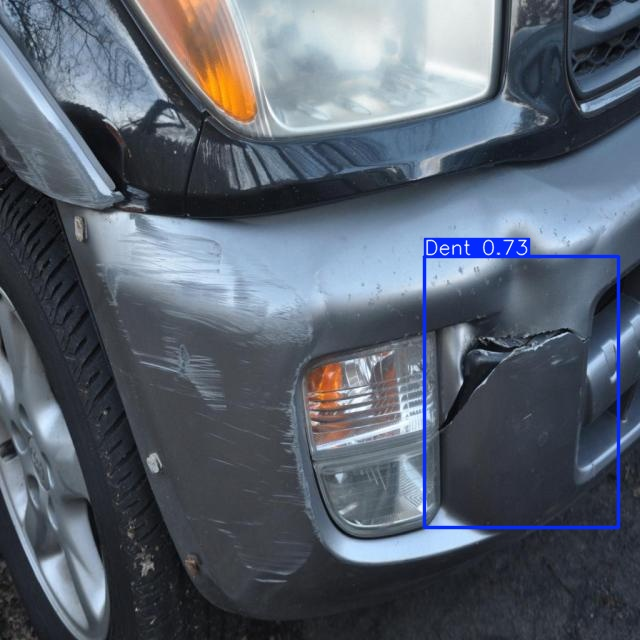

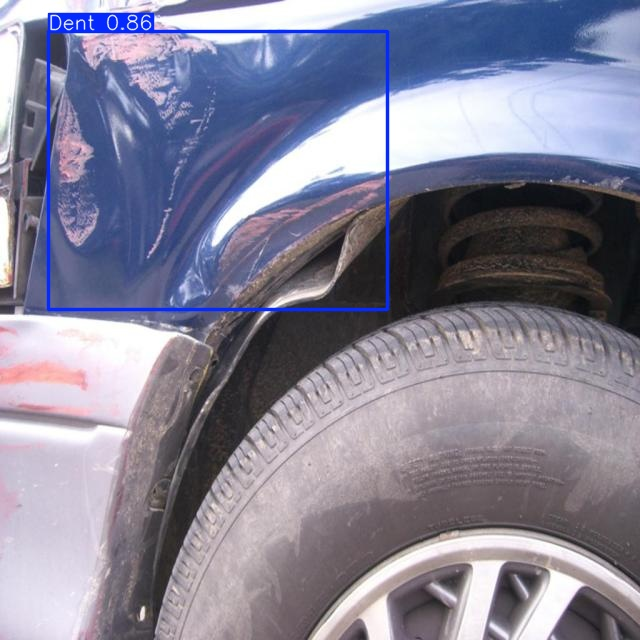

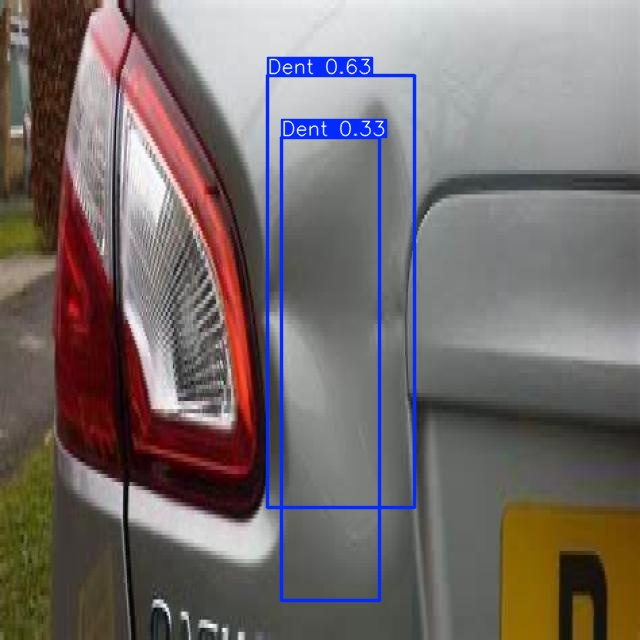

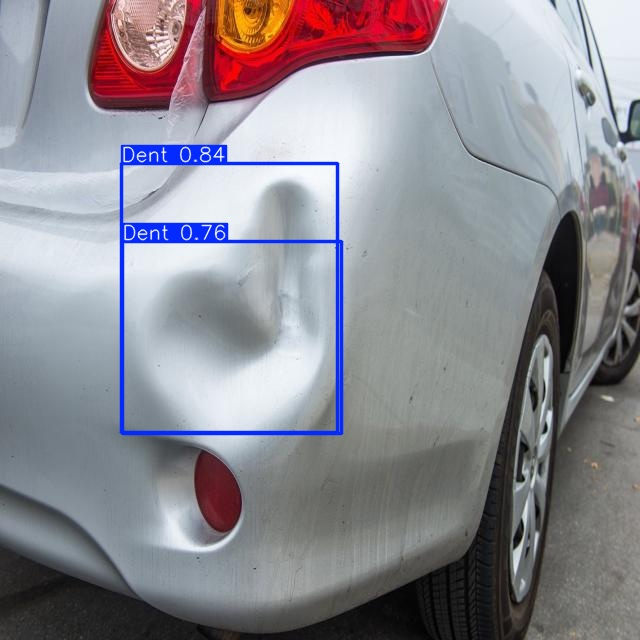

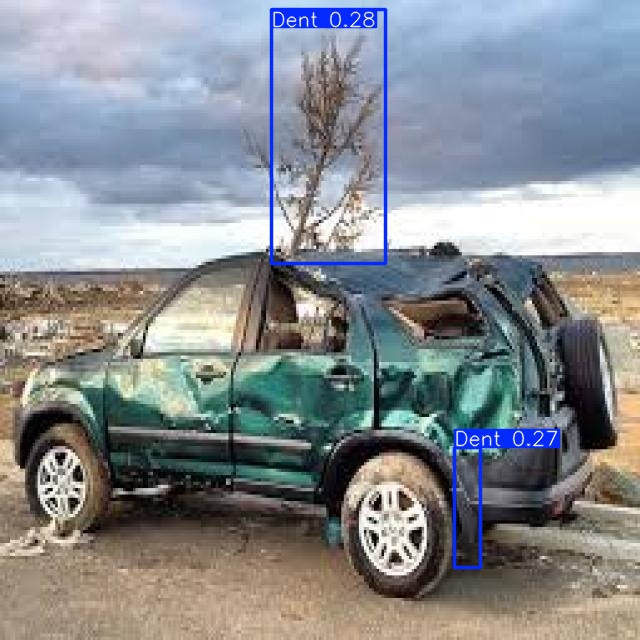

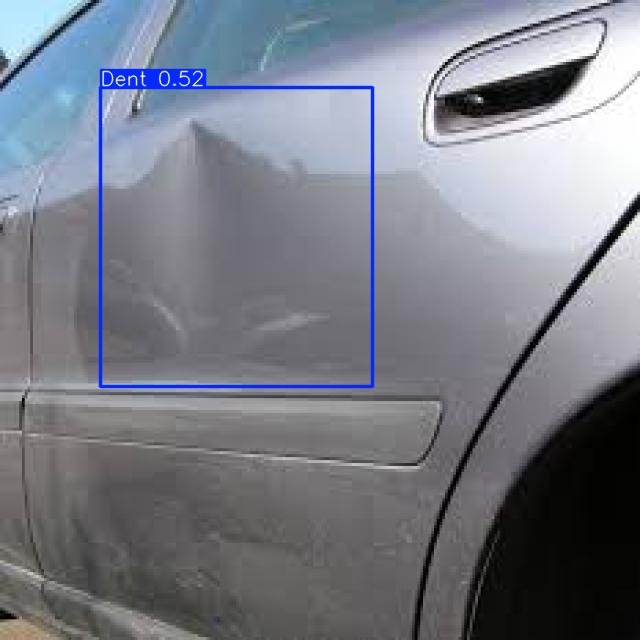

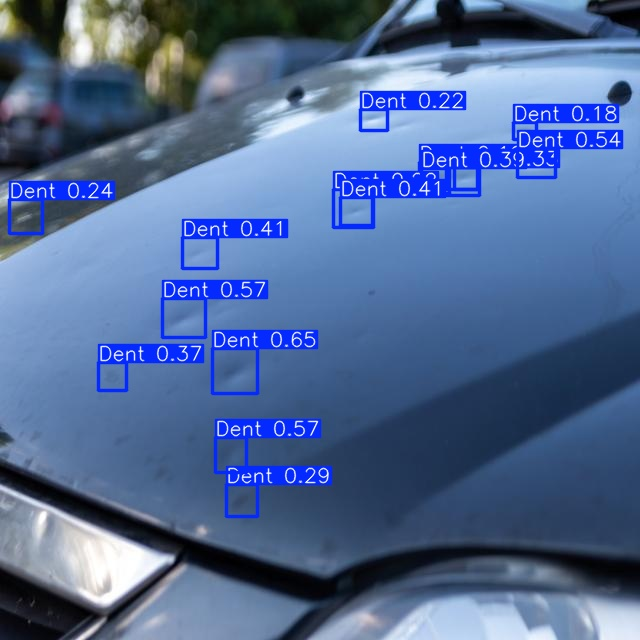

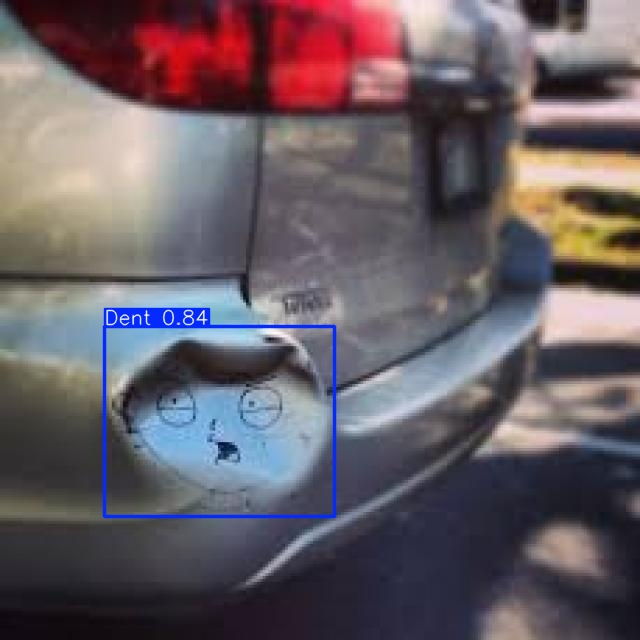

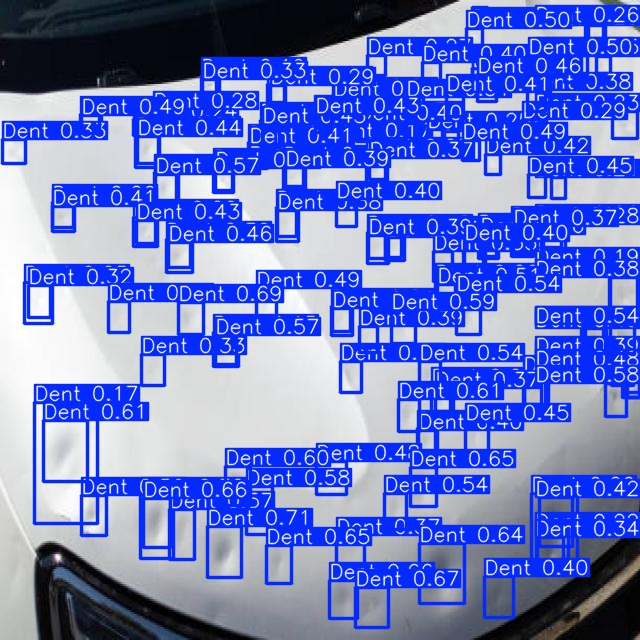

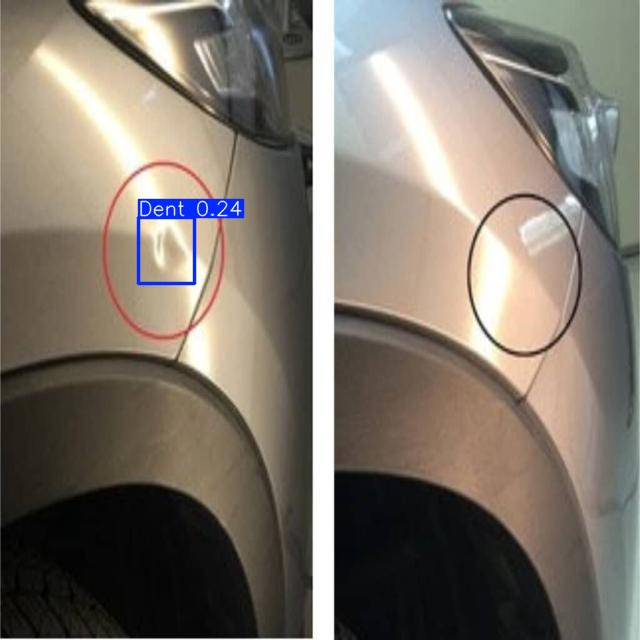

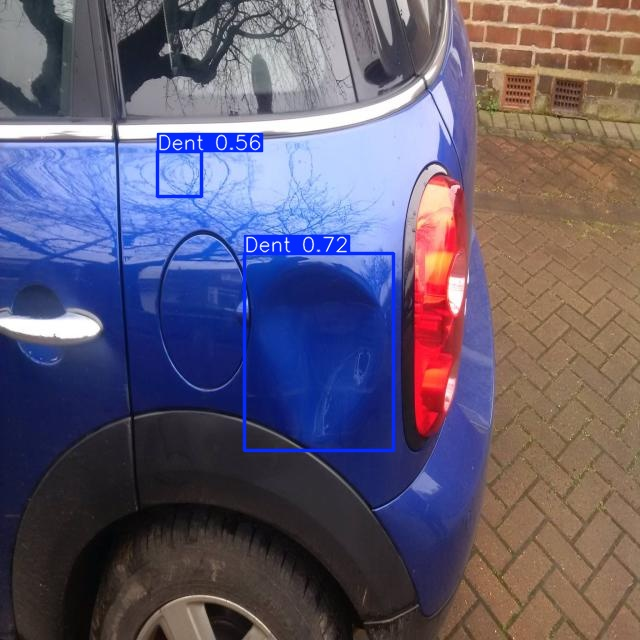

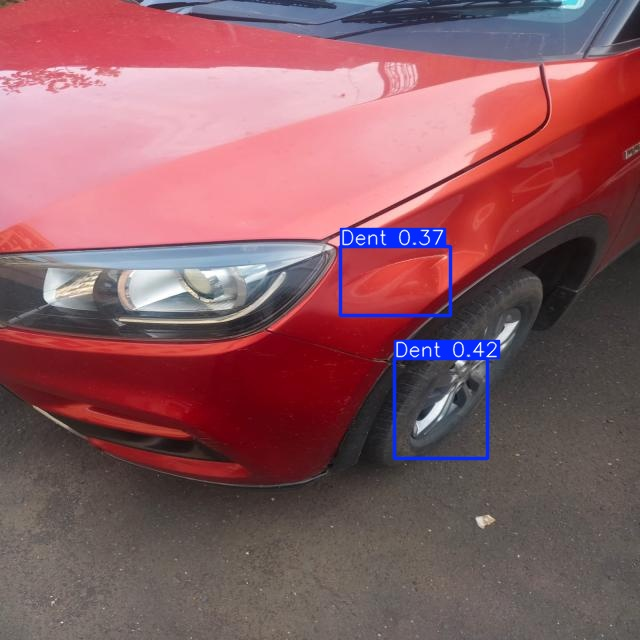

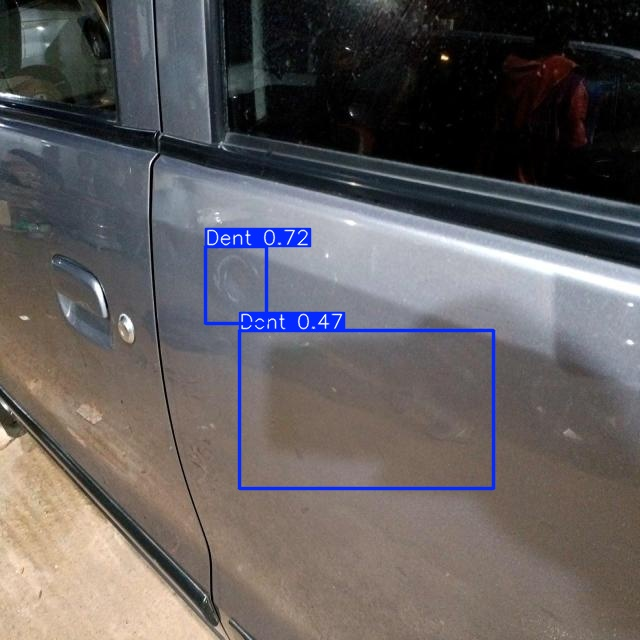

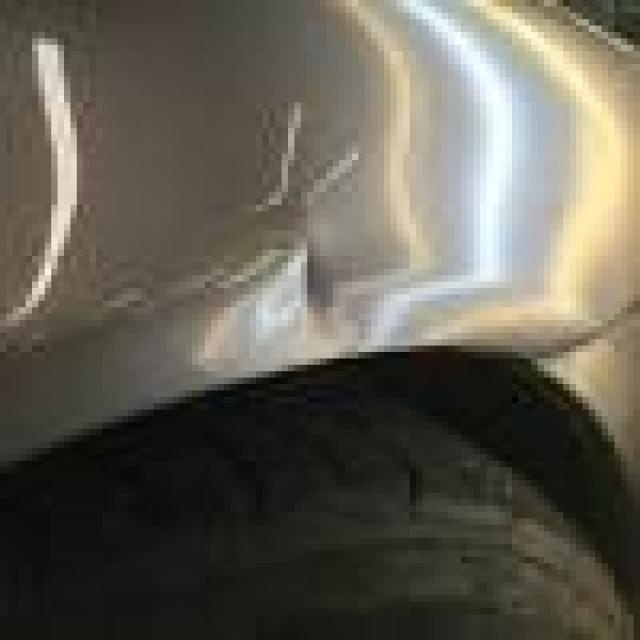

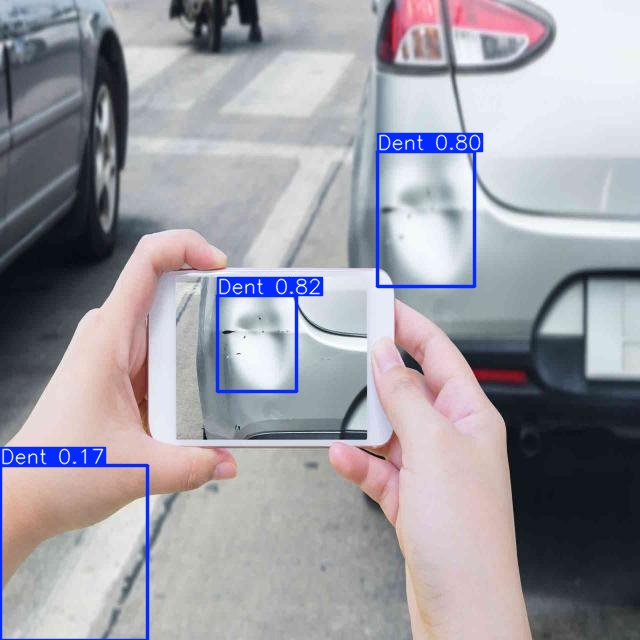

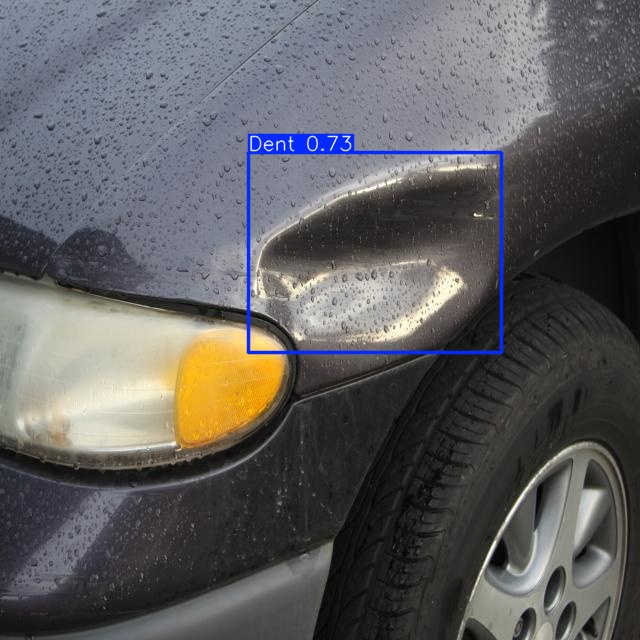

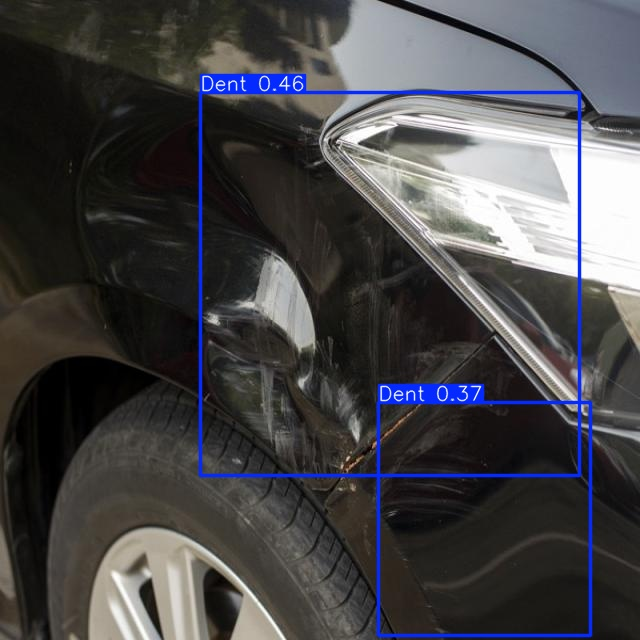

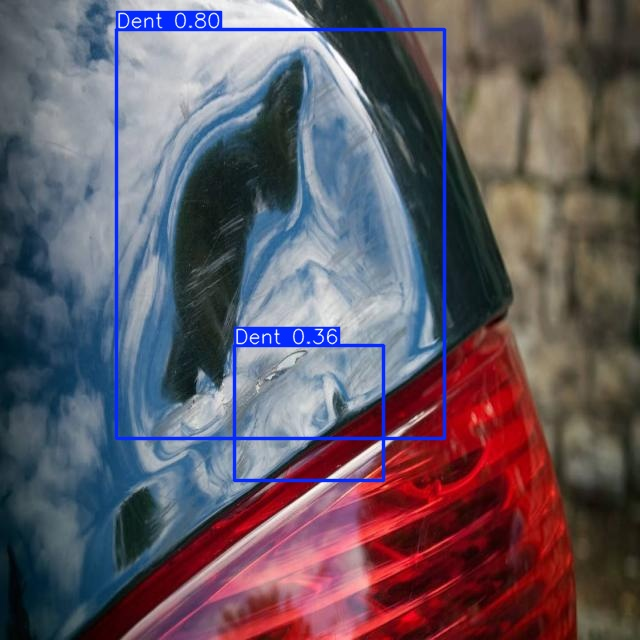

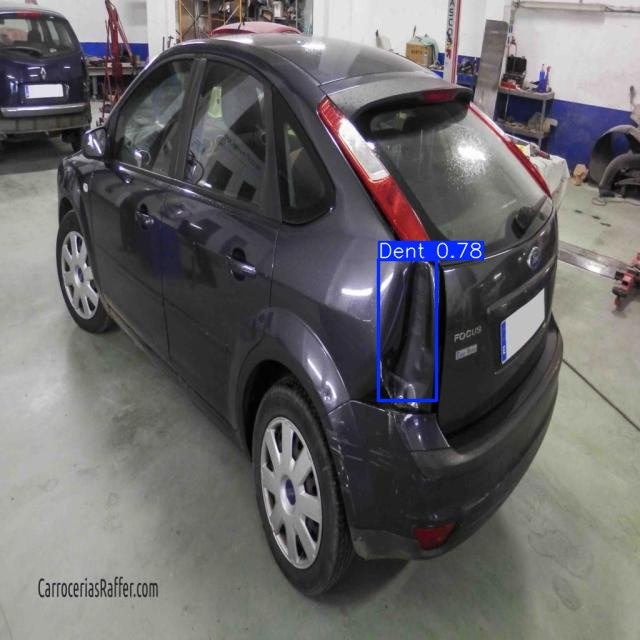

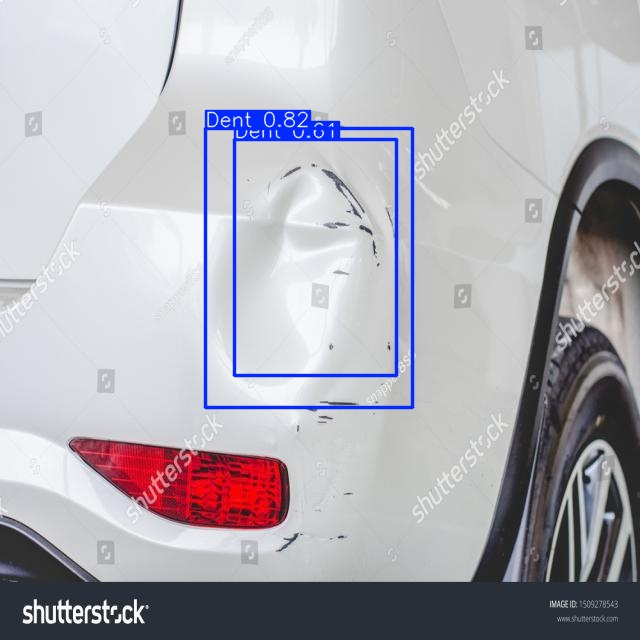

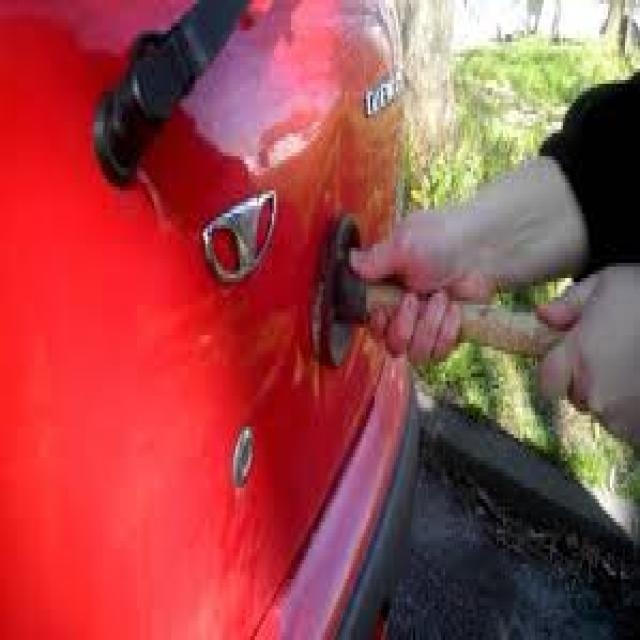

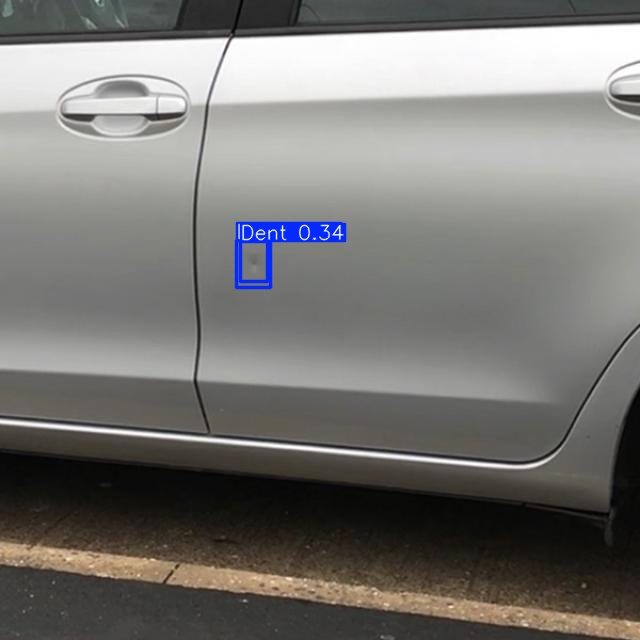

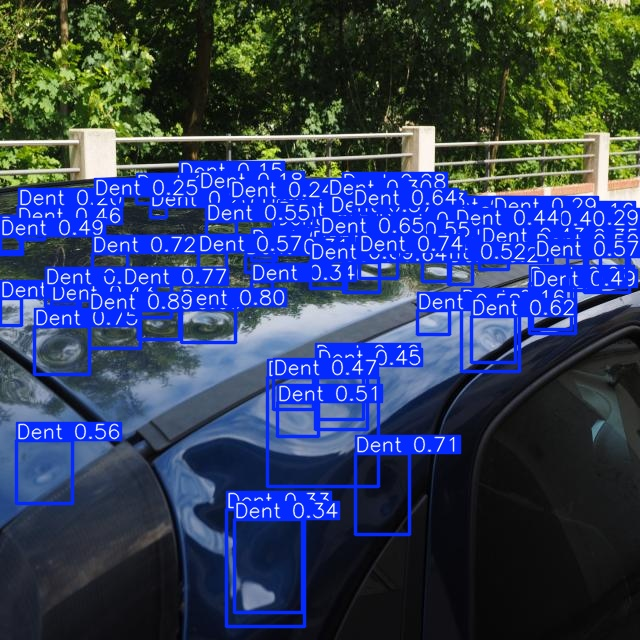

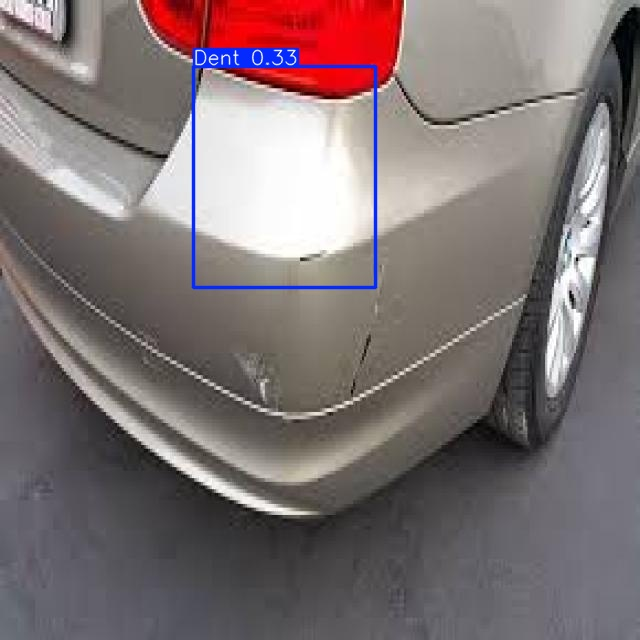

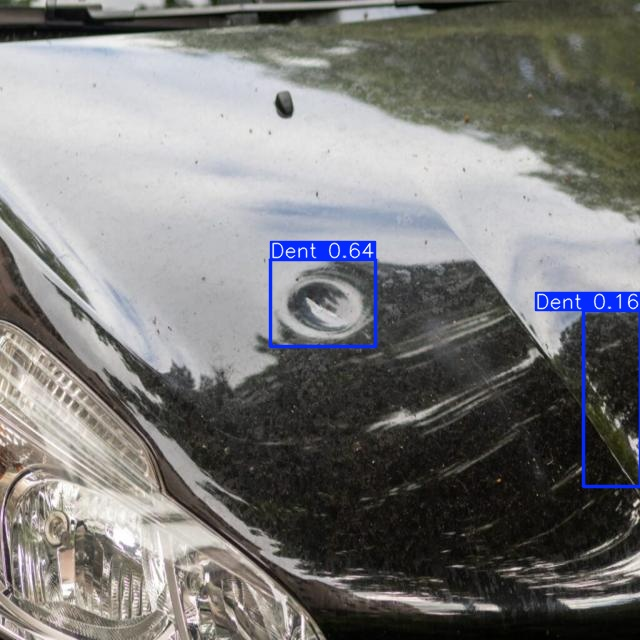

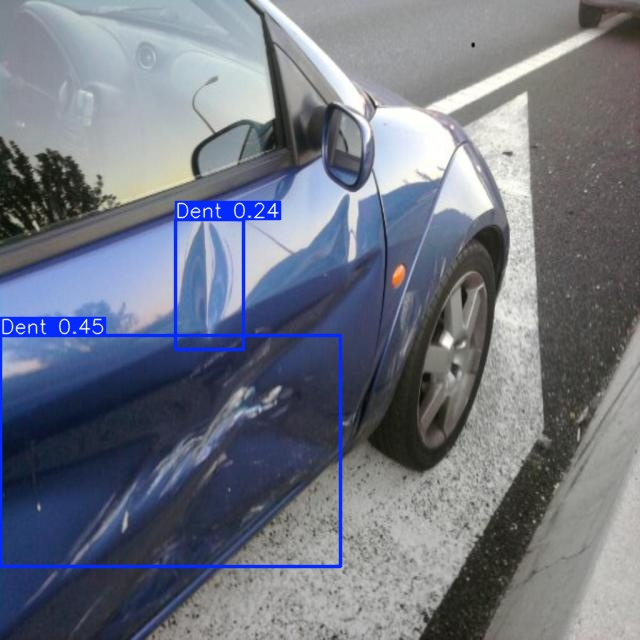

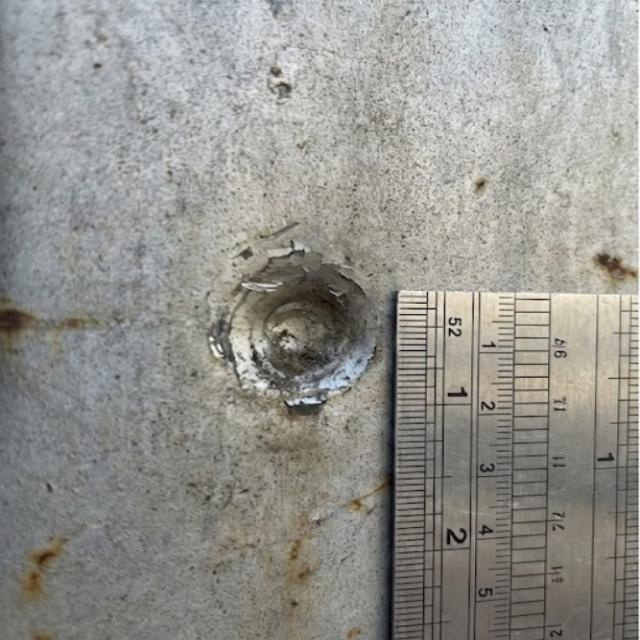

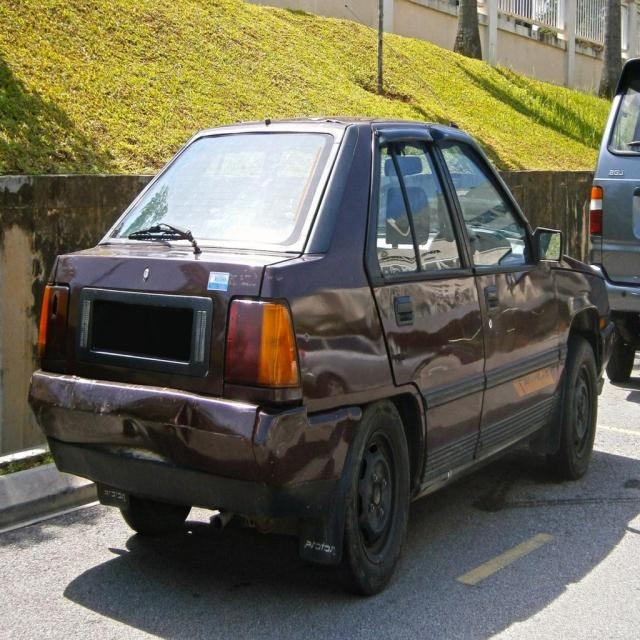

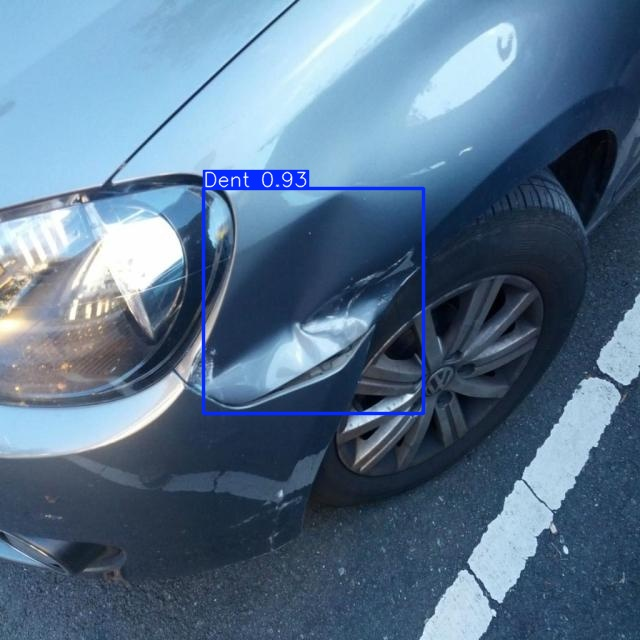

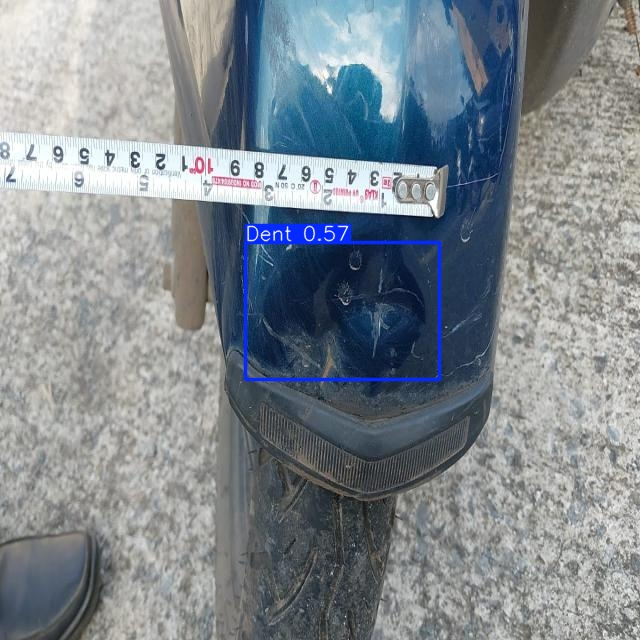

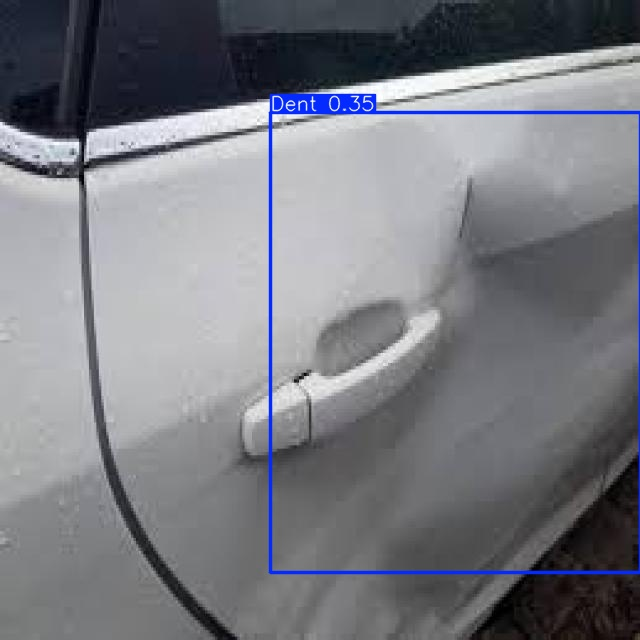

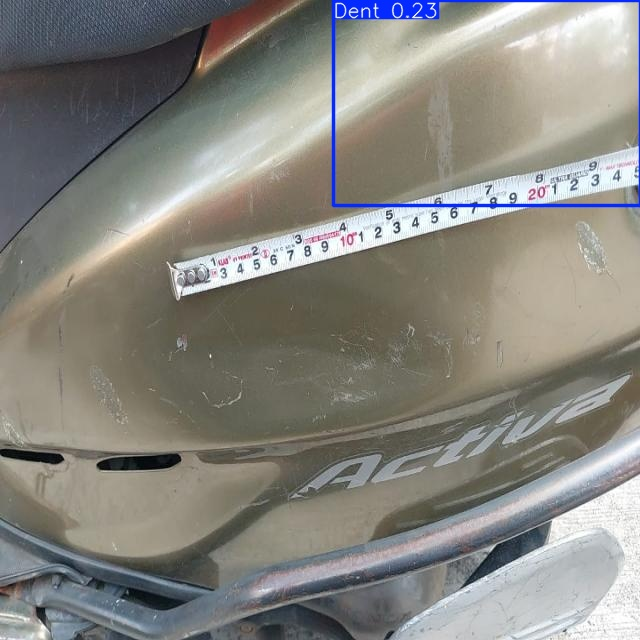

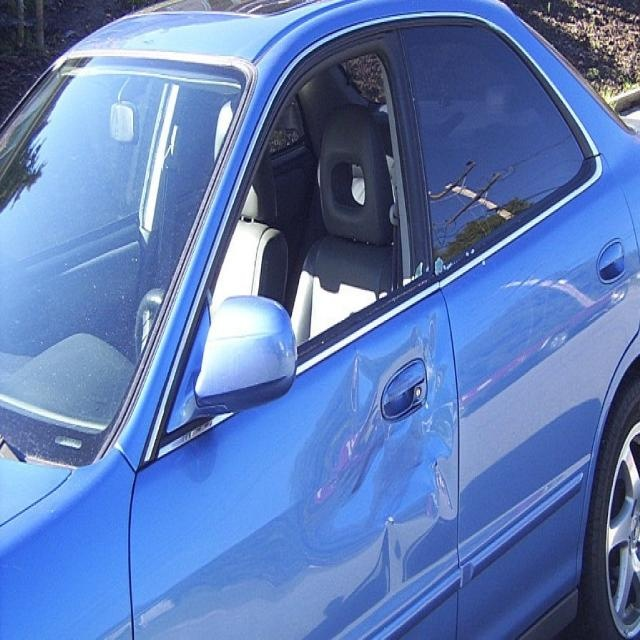

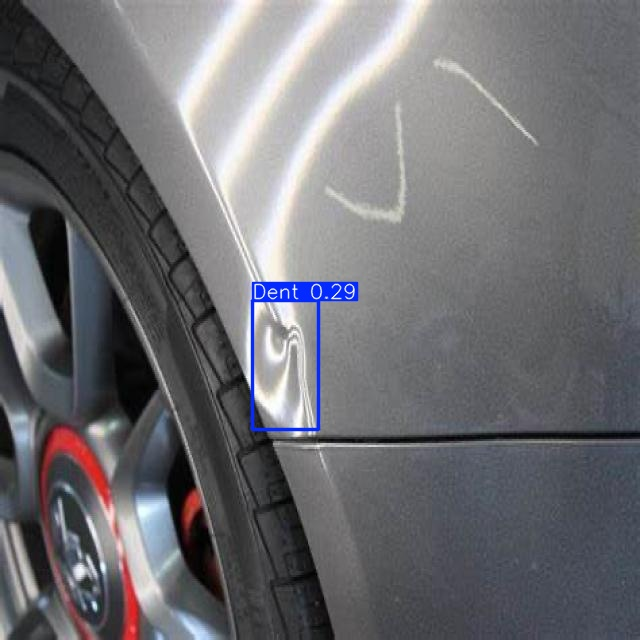

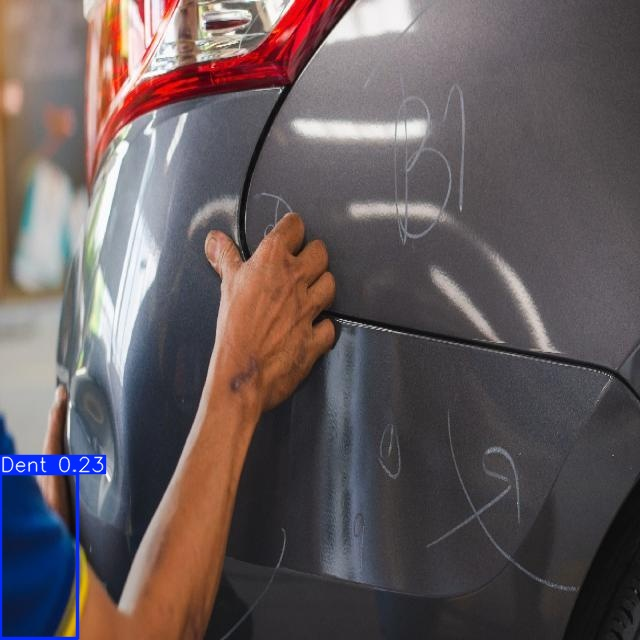

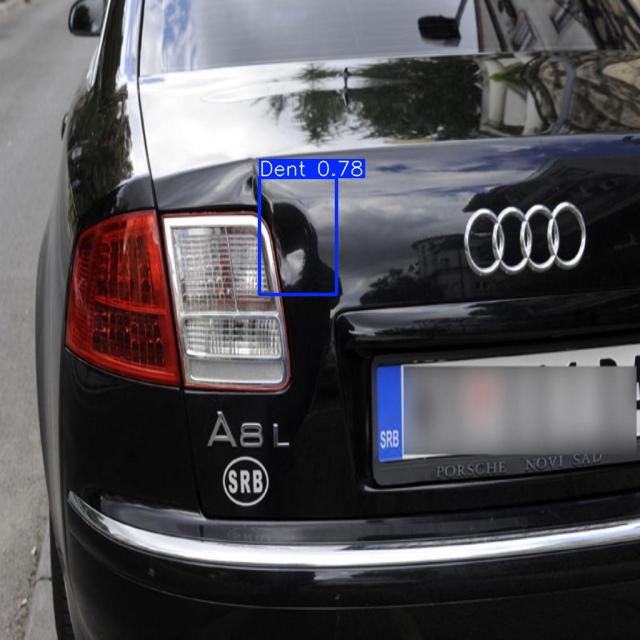

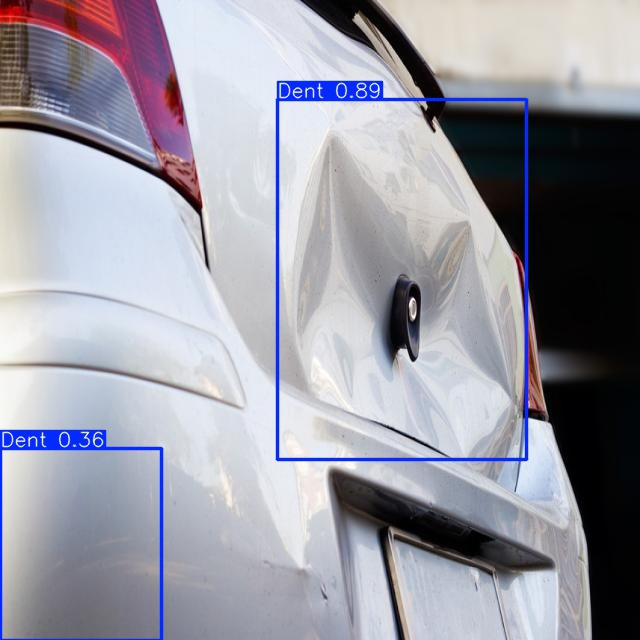

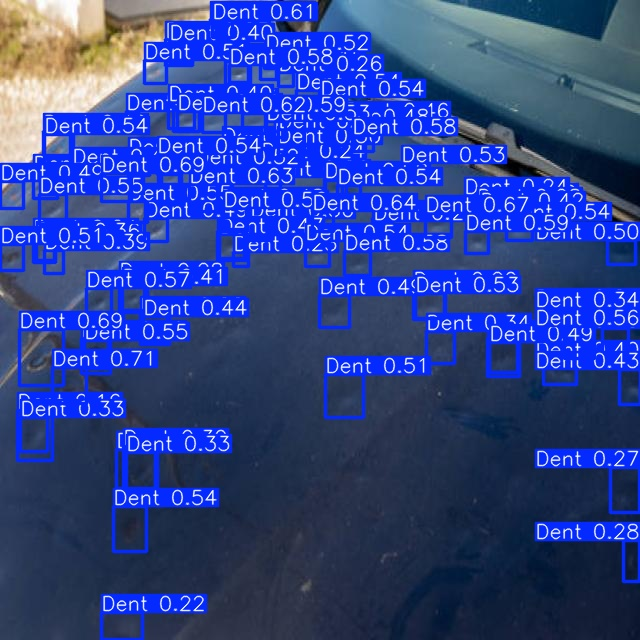

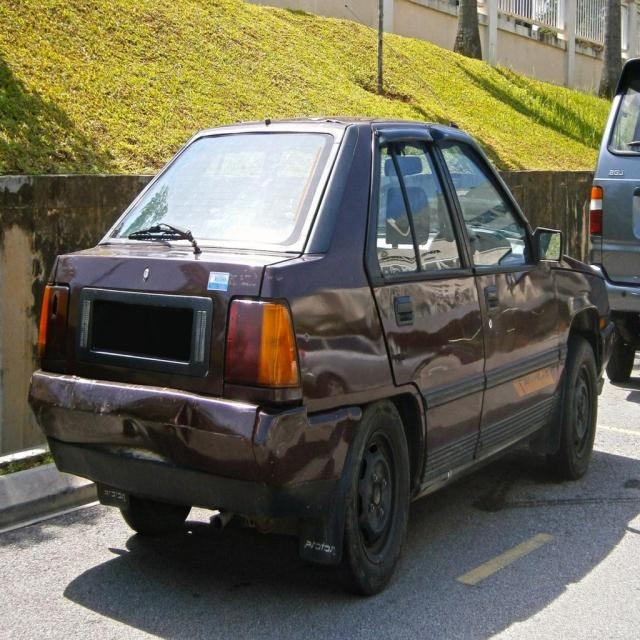

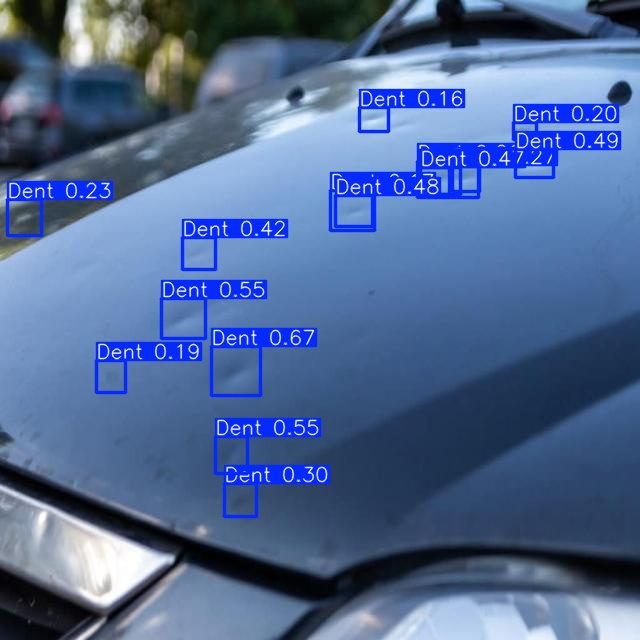

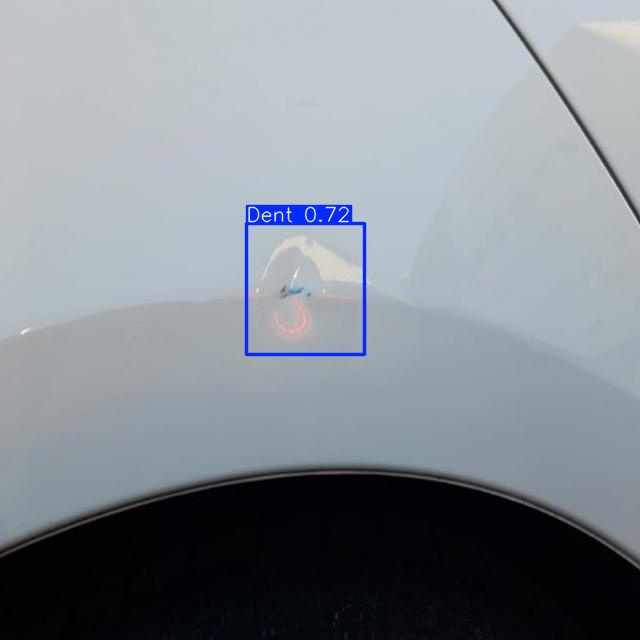

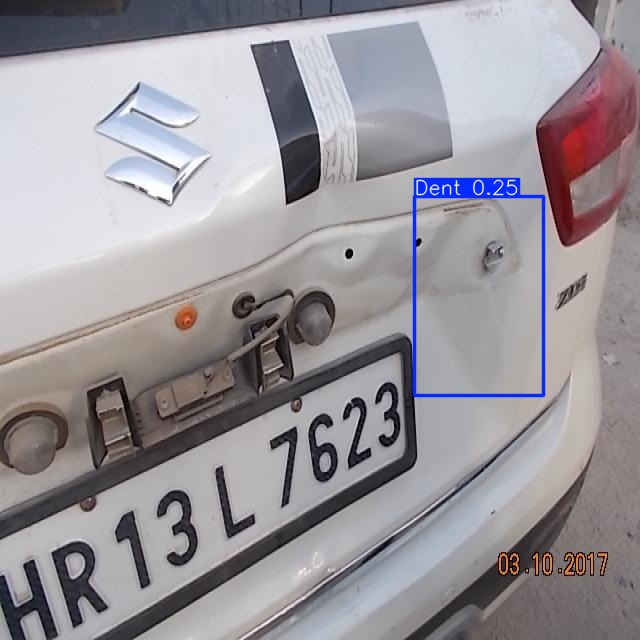

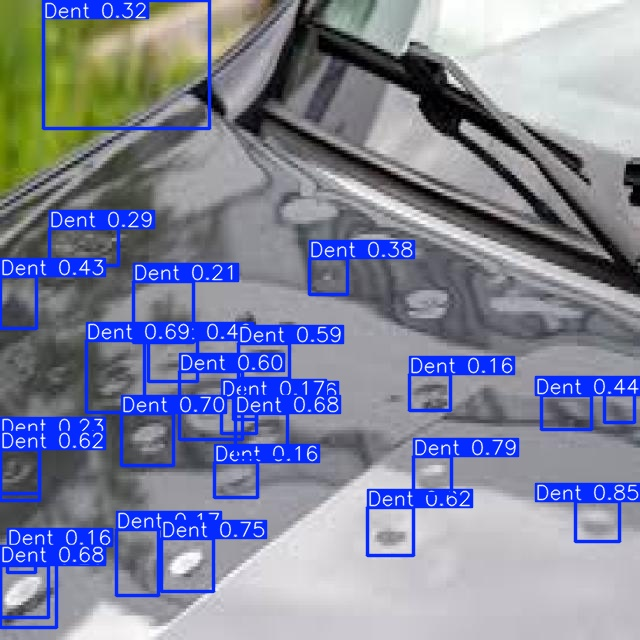

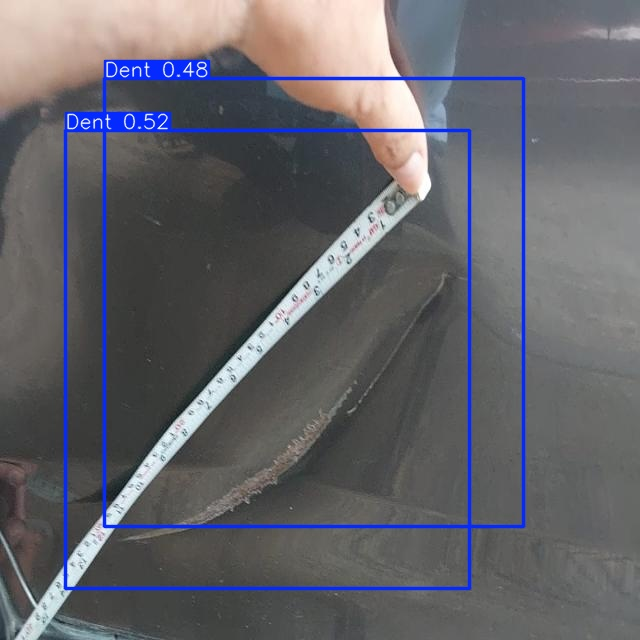

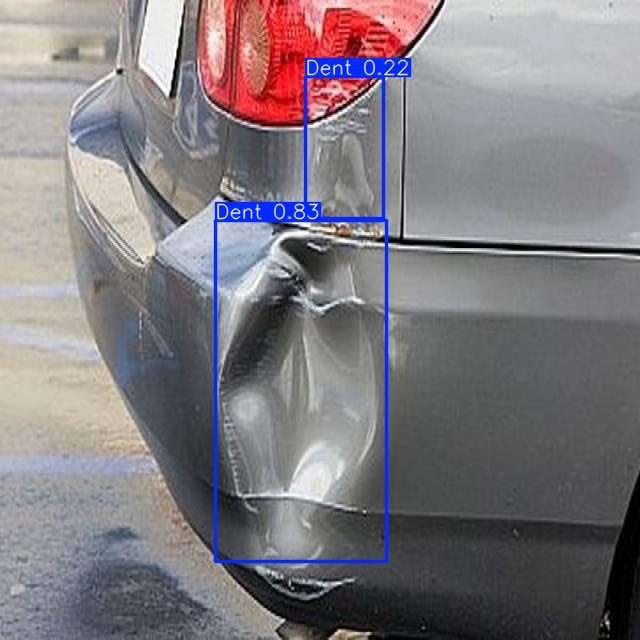

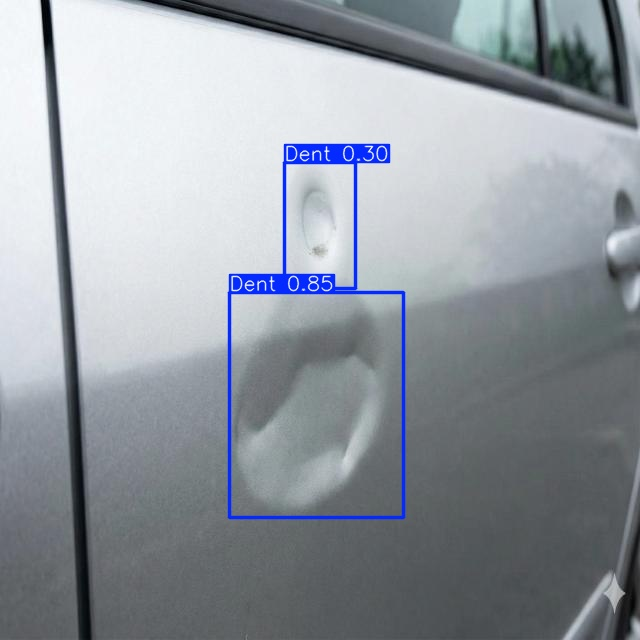

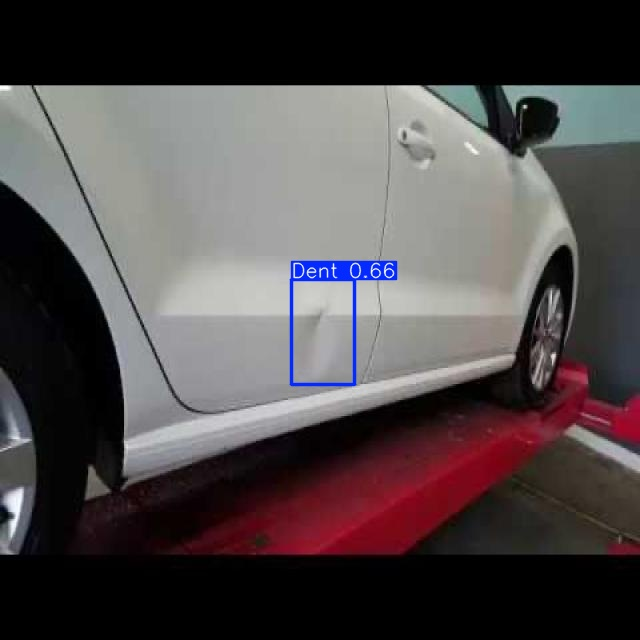

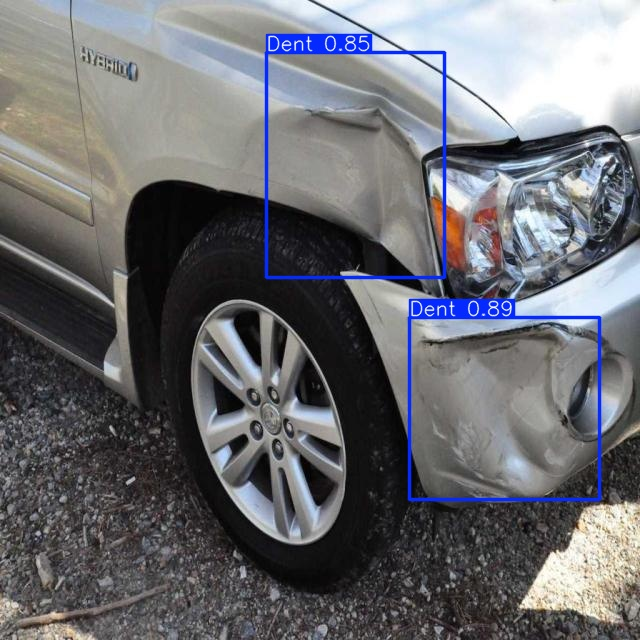

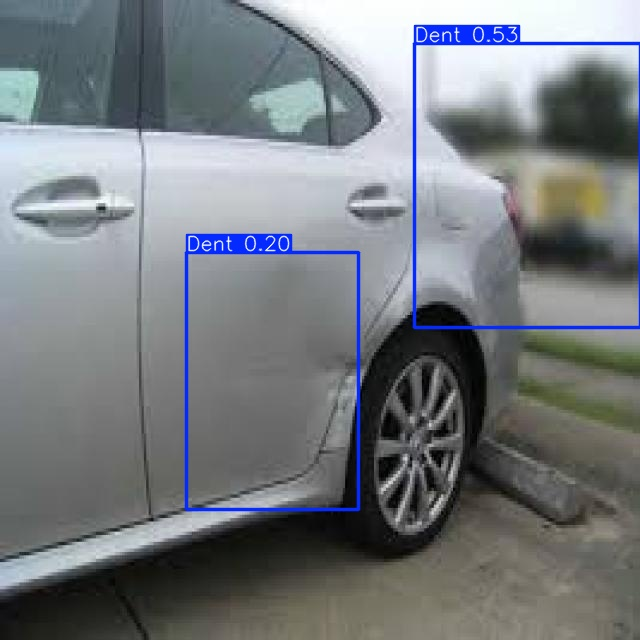

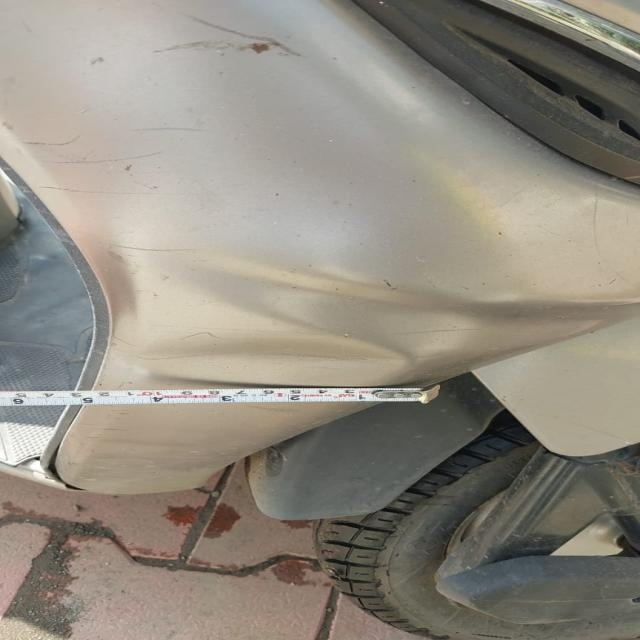

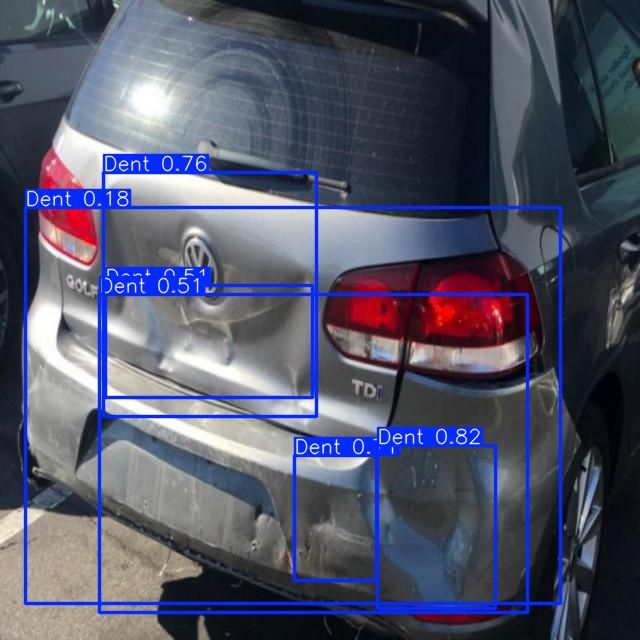

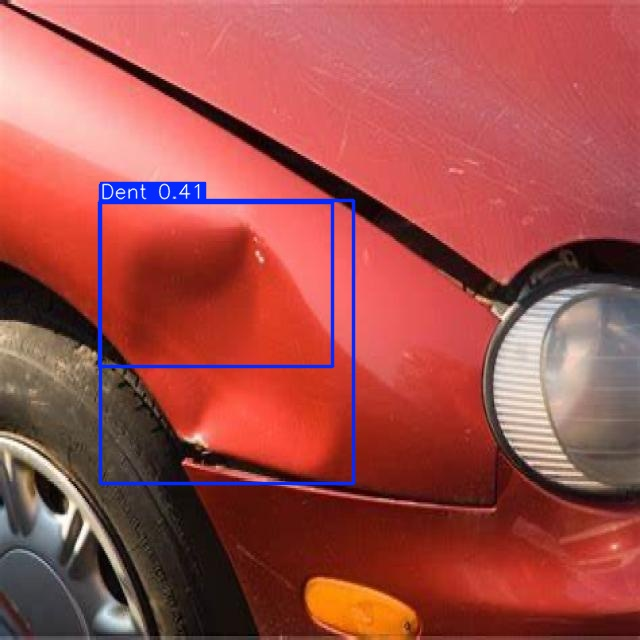

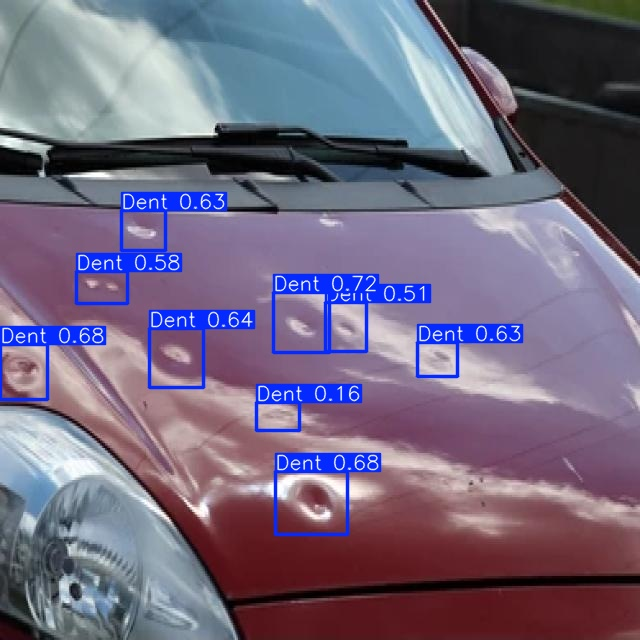

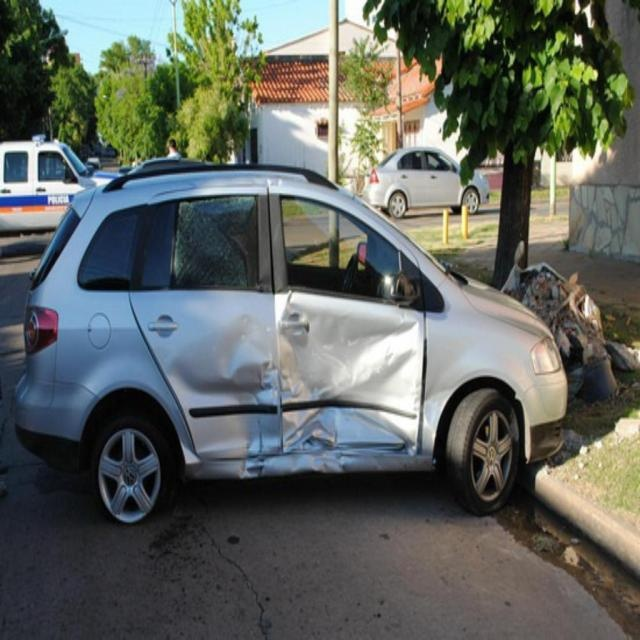

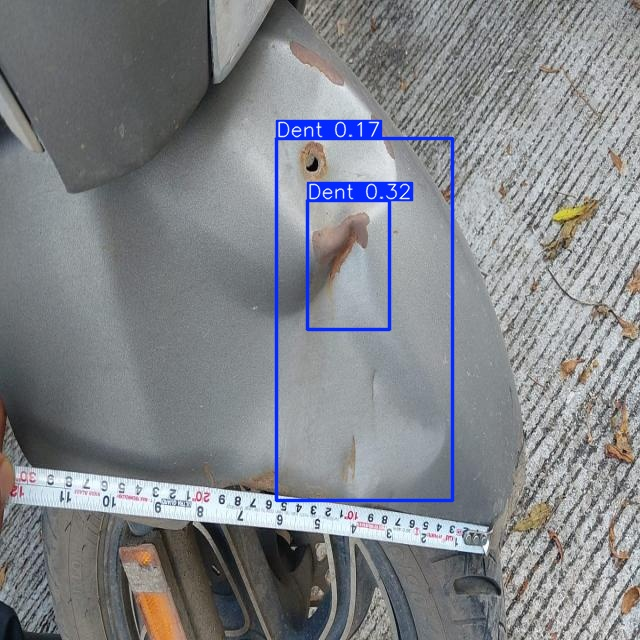

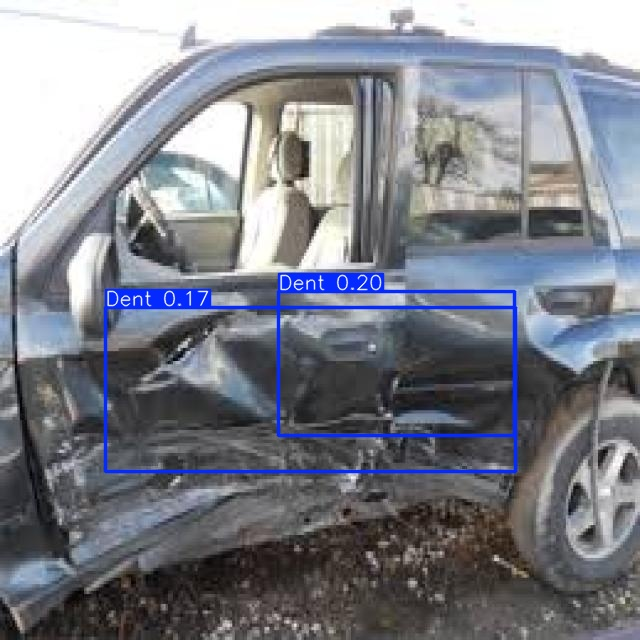

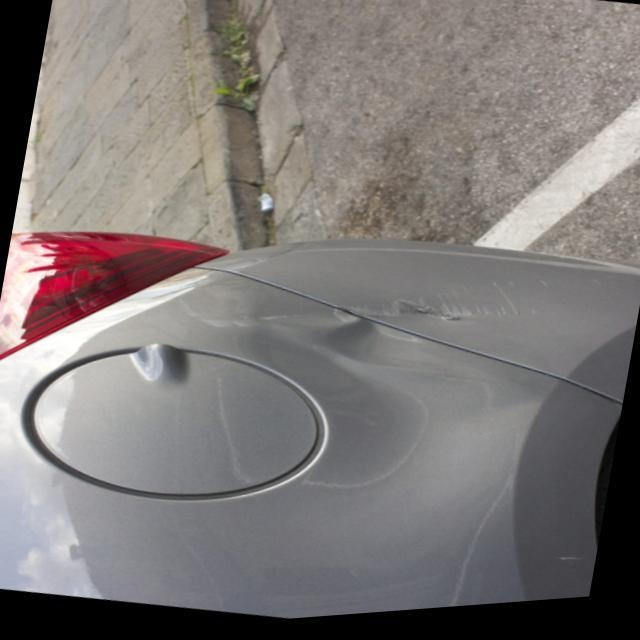

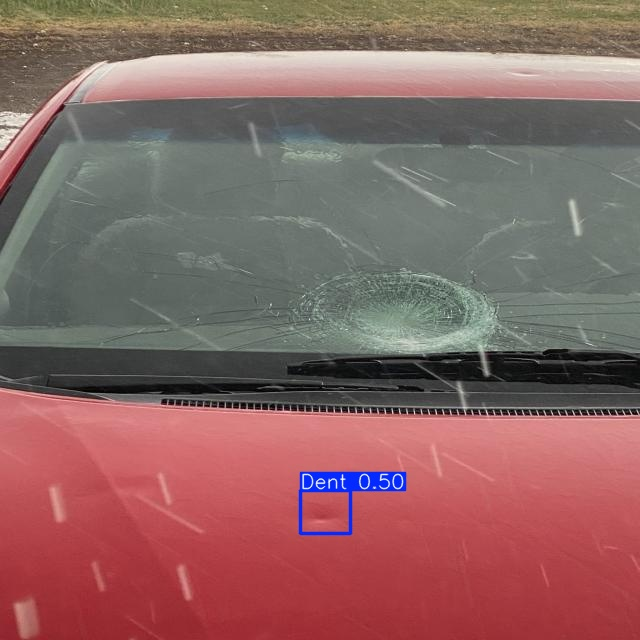

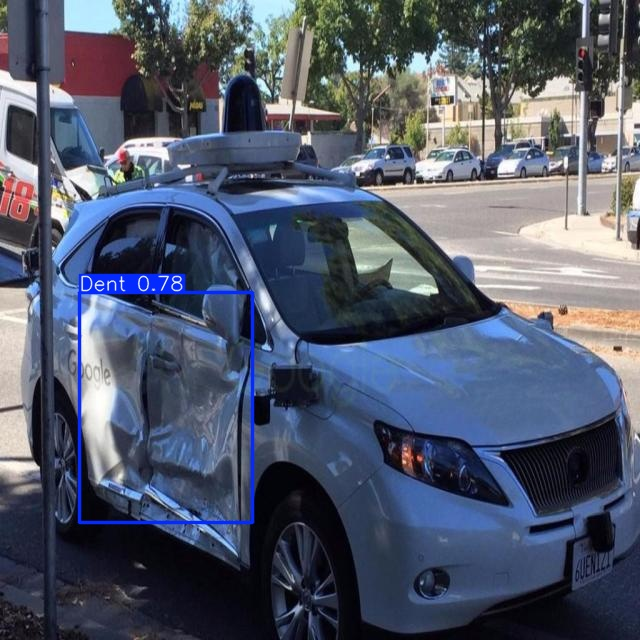

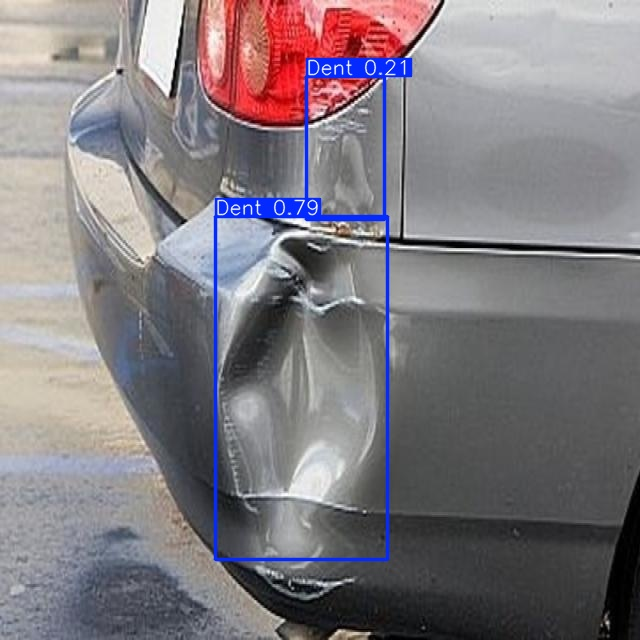

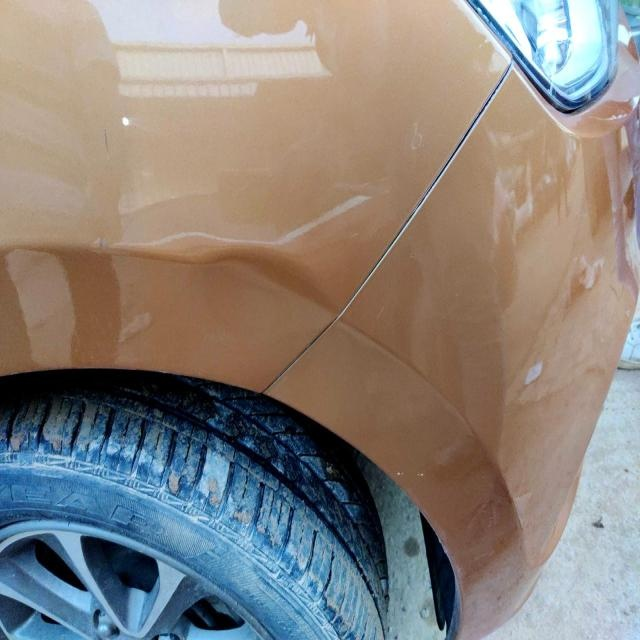

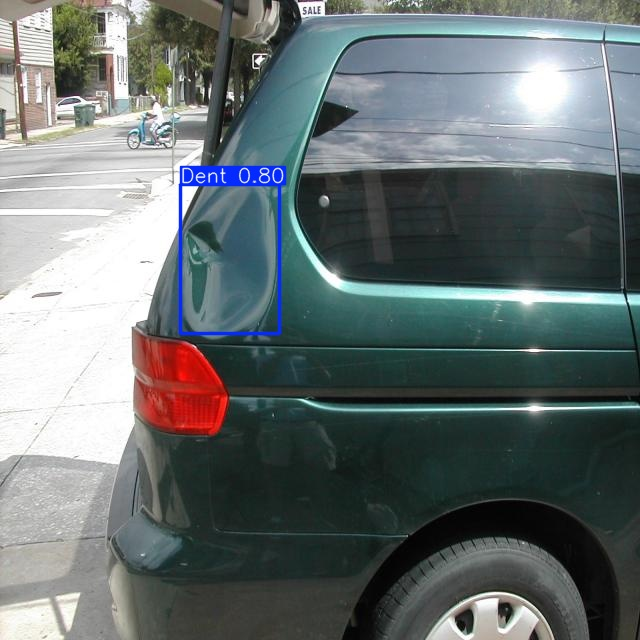

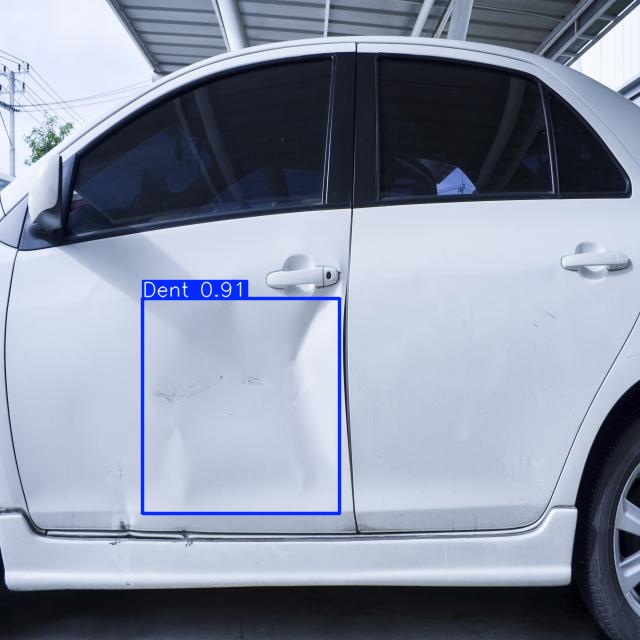

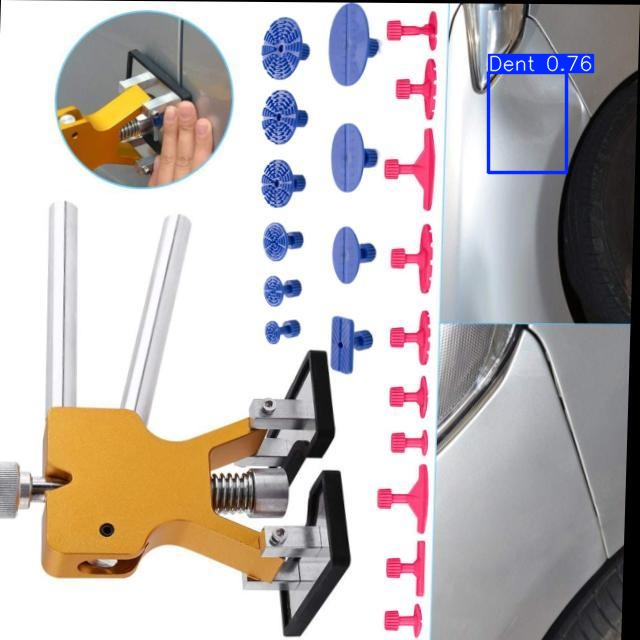

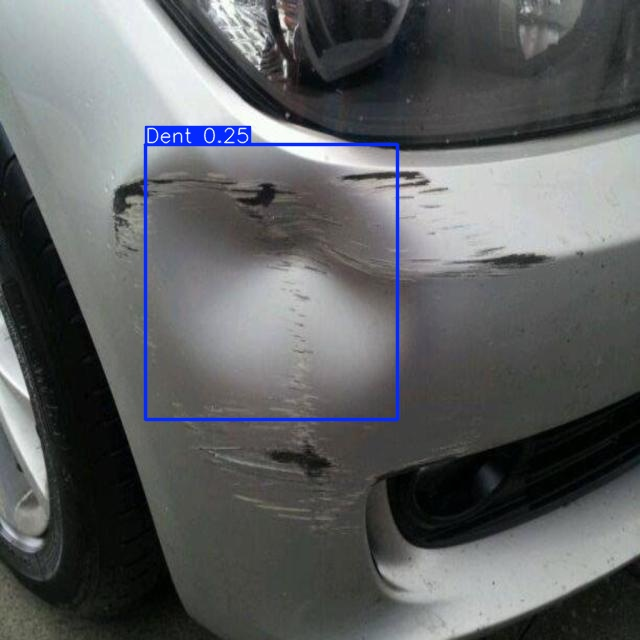

In [ ]:
import glob
from IPython.display import display, Image

pred_images = glob.glob("runs/detect/predict/*.jpg")

for img in pred_images:  # show first 10
    display(Image(filename=img))


In [ ]:
model.predict(
    source="dataset/test/images",
    conf=0.25,
    save=True
)



image 1/56 /content/dataset/test/images/01_jpg.rf.0964256c938707c819f0f504c27b9fed.jpg: 640x640 (no detections), 7.8ms
image 2/56 /content/dataset/test/images/04_jpg.rf.47d975fea4b102b5154329104d55853f.jpg: 640x640 (no detections), 7.3ms
image 3/56 /content/dataset/test/images/07_jpg.rf.b630c0970cd4c2f07c92f30739417653.jpg: 640x640 (no detections), 7.2ms
image 4/56 /content/dataset/test/images/07ca5ea5-bc40-4fcb-8b17-edfd3451950c_jpg.rf.52ef9df8a8a1a8556798cb103981b201.jpg: 640x640 (no detections), 7.2ms
image 5/56 /content/dataset/test/images/08319a1b-304c-46cd-a428-f28cc0403cd7_jpg.rf.6b4921f0ca865161500946b94f3f078d.jpg: 640x640 (no detections), 7.3ms
image 6/56 /content/dataset/test/images/09c32fb2-7df9-4632-9296-ca64d679404c_jpg.rf.ee5624a4e0c93e15911b8f7cdf493dbd.jpg: 640x640 1 Dent, 7.3ms
image 7/56 /content/dataset/test/images/0d6e9195-image51_png.rf.e42ba20f3807ac8eba5b7bb62eb14871.jpg: 640x640 (no detections), 7.2ms
image 8/56 /content/dataset/test/images/10_jpg.rf.b6d0567f5

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Dent', 1: 'Scratch'}
 obb: None
 orig_img: array([[[173, 179, 184],
         [173, 179, 184],
         [173, 179, 184],
         ...,
         [134, 142, 141],
         [136, 142, 141],
         [136, 142, 141]],
 
        [[173, 179, 184],
         [173, 179, 184],
         [173, 179, 184],
         ...,
         [134, 142, 141],
         [136, 142, 141],
         [136, 142, 141]],
 
        [[173, 179, 184],
         [173, 179, 184],
         [173, 179, 184],
         ...,
         [136, 143, 140],
         [136, 143, 140],
         [136, 143, 140]],
 
        ...,
 
        [[188, 209, 224],
         [184, 205, 220],
         [185, 206, 221],
         ...,
         [ 54,  66,  76],
         [ 45,  57,  67],
         [ 46,  58,  68]],
 
        [[179, 200, 215],
         [173, 194, 209],
         [174, 195, 210],
         ...,
      